In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load some house sales data

In [4]:
sales = pd.read_csv('home_data.csv')
sales.tail()

id             date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
21608   263000018  20140521T000000  360000         3       2.50         1530      1131     3.0           0     0          3      8        1530              0      2009             0    98103   
21609  6600060120  20150223T000000  400000         4       2.50         2310      5813     2.0           0     0          3      8        2310              0      2014             0    98146   
21610  1523300141  20140623T000000  402101         2       0.75         1020      1350     2.0           0     0          3      7        1020              0      2009             0    98144   
21611   291310100  20150116T000000  400000         3       2.50         1600      2388     2.0           0     0          3      8        1600              0      2004             0    98027   
21612  1523300157  20141015T000000  325000         2       0.75         1020      1076     2.0           0     0          3      7        1020              0      2008             0    98144   

           lat     long  sqft_living15  sqft_lot15  
21608  47.6993 -122.346           1530        1509  
21609  47.5107 -122.362           1830        7200  
21610  47.5944 -122.299           1020        2007  
21611  47.5345 -122.069           1410        1287  
21612  47.5941 -122.299           1020        1357

### Exploring the data for housing sales

In [116]:
X = sales['sqft_living'].values
y = sales['price'].values

plt.scatter(X, y)
plt.show()

In [117]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((21613, 1), (21613, 1))

### Create a simple regression model of sqft_living to price

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Build the regression model

In [120]:
from sklearn.linear_model import LinearRegression

sqft_model = LinearRegression()
sqft_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
sqft_model.coef_

array([[283.96855737]])

In [122]:
sqft_model.intercept_

array([-48257.06345556])

### Evaluate the simple model

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
print(y_test.mean())

529242.6106870229


In [125]:
y_pred = sqft_model.predict(X_test)
y_pred

array([[ 357817.97358056],
       [1277876.09945262],
       [ 360657.65915424],
       ...,
       [ 337940.17456481],
       [ 221513.06604396],
       [ 417451.37062783]])

In [126]:
mse = mean_squared_error(y_test, y_pred)
mse

61940787221.49824

In [127]:
rmse = mse**(1/2)
rmse

248879.06143647005

### Let's show what our predictions look like

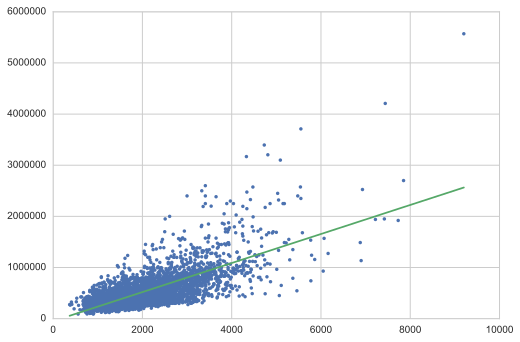

In [128]:
plt.plot(X_test, y_test, '.',
        X_test, y_pred, '-')

In [129]:
sqft_model.coef_, sqft_model.intercept_

(array([[283.96855737]]), array([-48257.06345556]))

### Explore other features in the data

In [130]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [131]:
sales[my_features].describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors       zipcode
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309  98077.939805
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989     53.505026
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000  98001.000000
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000  98033.000000
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000  98065.000000
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000  98118.000000
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000  98199.000000

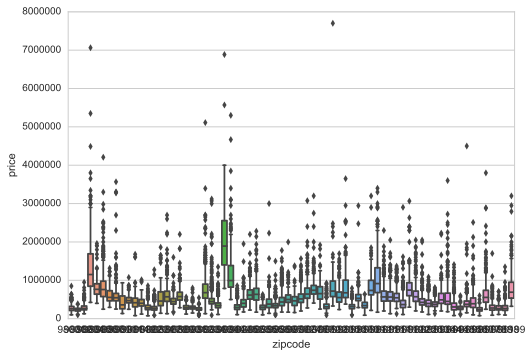

In [82]:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(x=sales['zipcode'], y=sales['price'])

### Build a regression model with more features

In [151]:
my_features_X = sales[my_features].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(my_features_X, y, test_size=0.2, random_state=0)

my_features_model = LinearRegression()
my_features_model.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
my_features_model.coef_, my_features_model.intercept_

(array([[-5.66006330e+04,  1.10870936e+04,  3.20408369e+02,
         -2.89499140e-01, -2.41800491e+03,  6.17971071e+02]]),
 array([-60558259.01813825]))

In [154]:
y_pred = sqft_model.predict(X_test)
y_pred2 = my_features_model.predict(X_test2)

sqft_mse = mean_squared_error(y_test, y_pred)
my_features_mse = mean_squared_error(y_test2, y_pred2)

def rmse(mse):
    return mse**(1/2)

print("sqft models have mse: {}, rmse: {}".format(sqft_mse, rmse(sqft_mse)))
print("my features models have mse: {}, rmse: {}".format(my_features_mse, rmse(my_features_mse)))

sqft models have mse: 61940787221.49824, rmse: 248879.06143647005
my features models have mse: 59538329945.14381, rmse: 244004.77443104226
